In [1]:
import pandas as pd
import sqlite3

In [2]:
from getpass import getpass
from mysql.connector import connect, Error
def connect_db(host, user):
    try:
    # Si la conexion se da satisfactoriamente, tendremos un mensaje de éxito.
     conn = connect(
                    host=host,
                    user=user,
                    password=getpass("Enter password: ")
                     )    
     print('SUCCESSFUL\n\n')
     return conn
    except Error as e:
    # En caso de tener un error de conexión, lo mostramos
        print(e)

In [3]:
host = "desafiotravel.cdtvtmfza8iy.eu-west-3.rds.amazonaws.com"
user = 'admin'

conn = connect_db(host, user)

SUCCESSFUL




In [4]:
cursor = conn.cursor()

In [5]:
cursor.execute("USE travelspain")

In [6]:
show_db_query = "SELECT * FROM input"

with conn.cursor() as cursor:
    cursor.execute(show_db_query)
    ls_input = cursor.fetchall()

In [7]:
ls_input

[(107, '3', 'Playa', 'Gastronomía'),
 (108, '16', 'Ciudad', 'Cultura'),
 (109, '18', 'Ciudad', 'Ocio Nocturno'),
 (110, '15', 'Playa', 'Familiar'),
 (111, '2', 'Montaña', 'Gastronomia'),
 (112, '3', 'Playa', 'Cultura'),
 (113, '14', 'Playa', 'Gastronomia'),
 (114, '10', 'Playa', 'Familiar'),
 (115, '14', 'Montaña', 'Ocio Nocturno'),
 (116, '13', 'Campo', 'Familiar'),
 (117, '12', 'Campo', 'Ocio Nocturno'),
 (118, '14', 'Campo', 'Ocio Nocturno'),
 (119, '13', 'Ciudad', 'Gastronomia'),
 (120, '15', 'Ciudad', 'Familiar'),
 (121, '15', 'Ciudad', 'Familiar'),
 (122, '16', 'Playa', 'Familiar'),
 (123, '2', 'Ciudad', 'Gastronomia'),
 (124, '2', 'Montaña', 'Gastronomia'),
 (125, '5', 'Campo', 'Ocio Nocturno'),
 (126, '4', 'Montaña', 'Gastronomia'),
 (127, '18', 'Campo', 'Gastronomia'),
 (128, '15', 'Ciudad', 'Cultura'),
 (129, '5', 'Montaña', 'Cultura'),
 (130, '2', 'Playa', 'Familiar'),
 (131, '8', 'Playa', 'Cultura'),
 (132, '3', 'Playa', 'Familiar'),
 (133, '5', 'Playa', 'Familiar'),
 (134,

In [8]:
df_input = pd.DataFrame(ls_input, columns=('ID_INDEX','PROVINCIAS','ENTORNO', 'ACTIVIDADES'))
df_input

,ID_INDEX,PROVINCIAS,ENTORNO,ACTIVIDADES
0,107,3,Playa,Gastronomía
1,108,16,Ciudad,Cultura
2,109,18,Ciudad,Ocio Nocturno
3,110,15,Playa,Familiar
4,111,2,Montaña,Gastronomia
5,112,3,Playa,Cultura
6,113,14,Playa,Gastronomia
7,114,10,Playa,Familiar
8,115,14,Montaña,Ocio Nocturno
9,116,13,Campo,Familiar


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
contador_actividades=df_input["ACTIVIDADES"].value_counts()
contador_actividades

Cultura          18
Gastronomia      14
Familiar         13
Ocio Nocturno     9
Gastronomía       1
Name: ACTIVIDADES, dtype: int64

<AxesSubplot:title={'center':'Total de visitas por actividad'}>

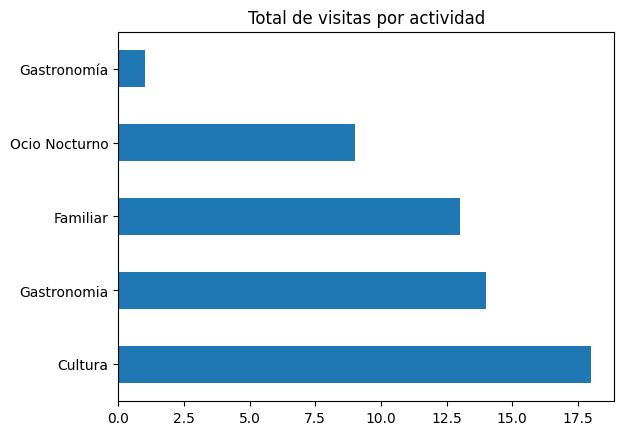

In [11]:
contador_actividades.plot(kind='barh',title="Total de visitas por actividad")

In [132]:
import plotly.express as px

colores2=df_input['ACTIVIDADES'].unique()
contador_actividades=df_input["ACTIVIDADES"].value_counts()
total2=contador_actividades.sum()
porcentaje2=(contador_actividades/total2)*100

fig = px.bar(df_input, y=df_input['ACTIVIDADES'].unique(), x=df_input['ACTIVIDADES'].value_counts(), text=porcentaje2,title="TOTAL DE VISITAS POR ACTIVIDAD", color=colores2, barmode="overlay", opacity=.90)
fig.update_traces(texttemplate='%{text:0.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(barmode='overlay',width=1200, height=800,title_font_size=25, title_font_color='black', title_xanchor='auto')
fig.update_layout(title_x=0.5, font_color='black')
fig.update_layout(font_color='black')
fig.update_layout(font_size=12)
fig.update_layout(xaxis_title="PORCENTAJE VISITAS", yaxis_title="ACTIVIDADES", legend_title="LEYENDA")
fig.show()

In [ ]:
colores=df_input['ENTORNO'].unique()
colores

In [ ]:
contador_entorno=df_input["ENTORNO"].value_counts()
total=contador_entorno.sum()
porcentaje=(contador_entorno/total)*100

In [129]:
import plotly.express as px

fig = px.bar(df_input, y=df_input['ENTORNO'].unique(), x=df_input['ENTORNO'].value_counts(), text=porcentaje,title="TOTAL DE VISITAS POR ENTORNO", color=colores, barmode="overlay", opacity=.90)
fig.update_traces(texttemplate='%{text:0.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(barmode='overlay',width=1200, height=800,title_font_size=25, title_font_color='black', title_xanchor='auto')
fig.update_layout(title_x=0.5, font_color='black')
fig.update_layout(font_color='black')
fig.update_layout(font_size=12)
fig.update_layout(xaxis_title="PORCENTAJE VISITAS", yaxis_title="ENTORNOS", legend_title="LEYENDA")
fig.show()

In [130]:
conn.close()